# Visualisations

This notebooks shows how to visualise the predictions of the semantic and panotpic segmentation models similarly to the figures presented in the paper.
In particular, we reproduce Figure 5 comparing the semantic prediction of U-TAE to the panoptic prediction of U-TAE+PaPs on the same Sentinel-2 Patch. 

### Requirements:
- PASTIS dataset
- Pre-trained weights of the models
- opencv-python (in addition tothe other requirements of the repository) 

Fill-in the paths in the next cell, and execute the cells to obtain the visualisation. 

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

def min_max_normalize(image, percentile=2):
    image = image.astype('float32')

    percent_min = np.percentile(image, percentile, axis=(0,1))
    percent_max = np.percentile(image, 100-percentile, axis=(0,1))

    mask = np.mean(image, axis=2) != 0
    if image.shape[1] * image.shape[0] - np.sum(mask) > 0:
        mdata = np.ma.masked_equal(image, 0, copy=False)
        mdata = np.ma.filled(mdata, np.nan)
        percent_min = np.nanpercentile(mdata, percentile, axis=(0, 1))

    norm = (image-percent_min) / (percent_max - percent_min)
    norm[norm<0] = 0
    norm[norm>1] = 1
    norm = norm * mask[:,:,np.newaxis]
    # norm = (norm * 255).astype('uint8') * mask[:,:,np.newaxis]

    return norm

In [35]:
pastis_dir = 'datasets/mini_pastis_dataset'
target_dir = 'datasets/mini_target_dataset'
pastis_img = glob(os.path.join(pastis_dir, 'DATA_S2') + '/*.npy')
target_img = glob(os.path.join(target_dir, 'img') + '/*.npy')

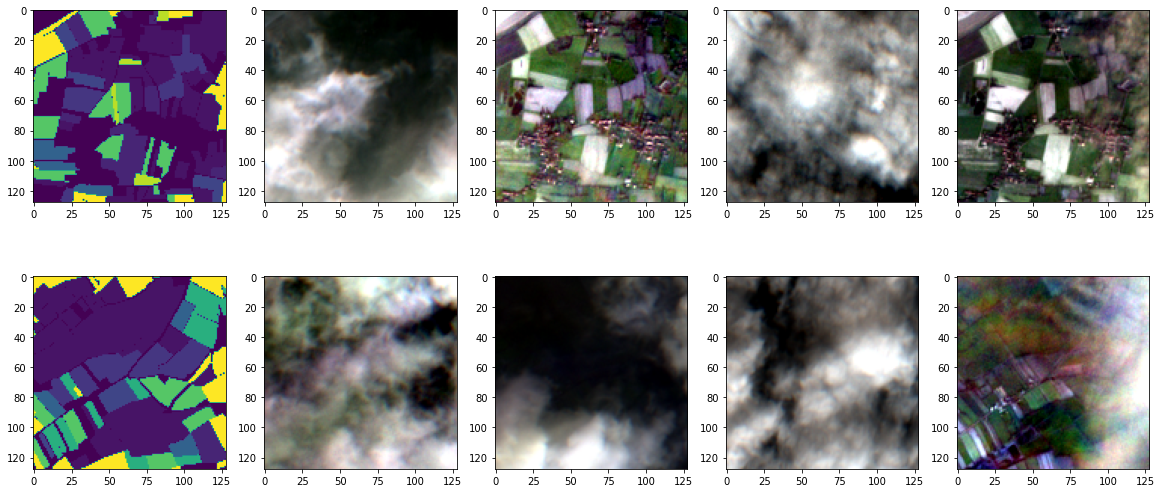

In [32]:
fig, ax = plt.subplots(2,5, figsize=(20,9))
for i in range(2):
    ax[i][0].imshow(np.load(os.path.join(pastis_dir, 'ANNOTATIONS', 'TARGET_' + os.path.basename(pastis_img[i]).split('_')[1])).transpose(1,2,0)[:,:,0])
    for j in range(1, 5):
        ax[i][j].imshow(min_max_normalize(np.load(pastis_img[i])[j+10].transpose(1,2,0)[:,:,:3]))
plt.show()


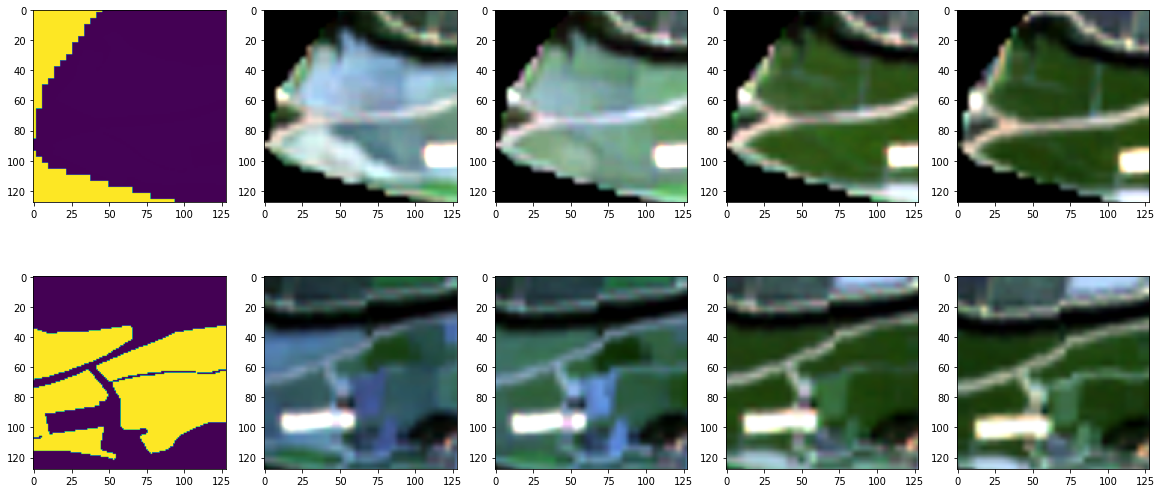

In [40]:
fig, ax = plt.subplots(2,5, figsize=(20,9))
for i in range(2):
    ax[i][0].imshow(np.load(os.path.join(target_dir, 'gt', os.path.basename(target_img[i]))))
    for j in range(1, 5):
        ax[i][j].imshow(min_max_normalize(np.load(target_img[i])[j].transpose(1,2,0)[:,:,:3]))
plt.show()
